## 1. Carga de Datos

In [1]:
# Importación de las bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_csv('co-emissions-per-capita new.csv')

+ #1. Importar bibliotecas:

#Pandas: Para manipulación y análisis de datos.
#Numpy: Para operaciones numéricas.
#Matplotlib.pyplot: Para crear gráficos visuales de los datos.

+ #2. Cargar el archivo CSV:

#pd.read_csv() carga el archivo CSV y lo convierte en un DataFrame de pandas.
#df.head() muestra las primeras 5 filas del DataFrame para verificar que la carga fue exitosa

## 2. Exploración Básica

In [2]:
# Mostrar las primeras 5 filas que se cargo correctamente 
df.head(5)

,Entity,Year,Annual CO₂ emissions (per capita)
0,Africa,1750,0
1,Andorra,1750,0
2,Asia,1750,0
3,Asia (excl. China and India),1750,0
4,Australia,1750,0


In [3]:
#Resumen estadistico
df.describe()

,Year
count,26600.000000
mean,1949.096880
std,56.387496
min,1750.000000
25%,1915.000000
50%,1963.000000
75%,1994.000000
max,2022.000000


In [4]:
#Informacion del DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26600 entries, 0 to 26599
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Entity                             26600 non-null  object
 1   Year                               26600 non-null  int64 
 2   Annual CO₂ emissions (per capita)  26600 non-null  object
dtypes: int64(1), object(2)
memory usage: 623.6+ KB


+ #1.df.head():
Muestra las primeras 5 filas del DataFrame, lo que te permite ver una muestra de los datos y verificar que la carga fue correcta.

+ #2.df.describe():
Muestra un resumen estadístico de las columnas numéricas, como la media, desviación estándar, valores mínimos, máximos y percentiles (25%, 50%, 75%).
Es útil para entender la distribución de los datos numéricos.

+ #3.df.info():
Proporciona información general sobre el DataFrame, incluyendo el número total de filas, las columnas, el tipo de datos de cada columna y la cantidad de valores no nulos en cada columna.
Esto es útil para identificar problemas con datos faltantes o entender la estructura de los datos.

## 3. Limpieza de Datos

In [5]:
# Verificar si hay valores nulos en el DataFrame
print(df.isnull().sum())
# Elimina las filas con valores nulos
df_cleaned = df.dropna()
# Mostrar un resumen de los valores únicos en cada columna
print(df.nunique())  

Entity                               0
Year                                 0
Annual CO₂ emissions (per capita)    0
dtype: int64
Entity                                 231
Year                                   228
Annual CO₂ emissions (per capita)    24407
dtype: int64


+ #1. Verificar valores nulos:
df.isnull().sum(): Esto devuelve la cantidad de valores nulos (NaN) en cada columna. Es útil para detectar si hay columnas con datos faltantes.

+ #2. Estrategia para manejar los valores nulos:
Si hay valores nulos, hay dos estrategias comunes:
Eliminar las filas con valores nulos: df.dropna(). Esto elimina todas las filas que contienen al menos un valor nulo.
Rellenar los valores nulos: df.fillna(). Puedes rellenar los valores nulos con un valor específico o calcular un valor para hacerlo automáticamente. Por ejemplo, usar la media de cada columna para rellenar los valores nulos en las columnas numéricas.

+ #3.Resumen de valores únicos:
df.nunique(): Devuelve el número de valores únicos en cada columna del DataFrame. Esto es útil para obtener una visión general de la diversidad de valores en cada columna, por ejemplo, si hay columnas categóricas, te permitirá ver cuántos valores distintos tiene cada una.

## 4. Análisis Exploratorio

In [6]:
print(df.columns)

Index(['Entity', 'Year', 'Annual CO₂ emissions (per capita)'], dtype='object')


In [ ]:
# Convertir la columna a valores numéricos, reemplazando errores por NaN
df['Annual CO₂ emissions (per capita)'] = pd.to_numeric(df['Annual CO₂ emissions (per capita)'], errors='coerce')
# Eliminar filas con NaN
df = df.dropna(subset=['Annual CO₂ emissions (per capita)'])

In [10]:
# 1.-Calcula y muestra la media, mediana y moda de las emisiones de CO2 per capita
# Calcular la media, mediana y moda de las emisiones de CO2 per capita
mean_co2 = df['Annual CO₂ emissions (per capita)'].mean()
median_co2 = df['Annual CO₂ emissions (per capita)'].median()
mode_co2 = df['Annual CO₂ emissions (per capita)'].mode()[0]  # mode() devuelve una serie

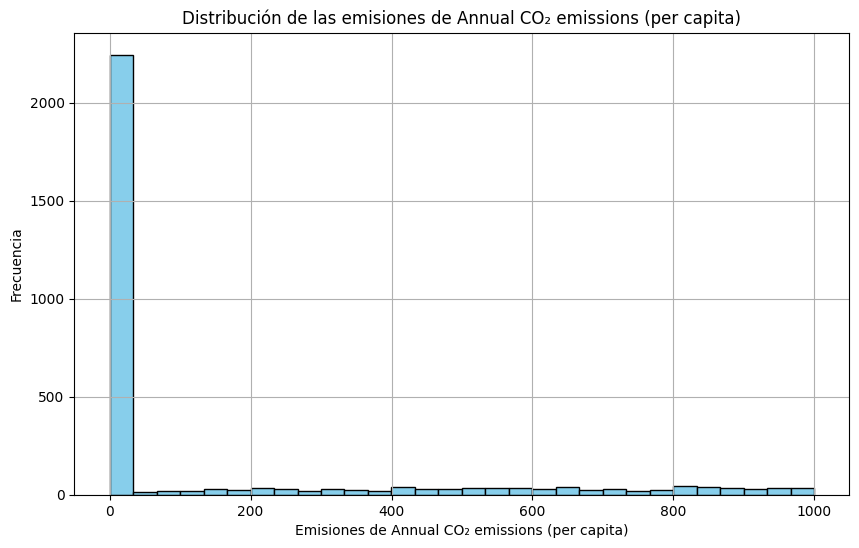

In [12]:
# 2.-Realiza un análisis de la distribución de los datos utilizando histogramas
# Crear un histograma para visualizar la distribución de las emisiones de CO2 per cápita
plt.figure(figsize=(10, 6))
plt.hist(df['Annual CO₂ emissions (per capita)'], bins=30, edgecolor='black', color='skyblue')
plt.title('Distribución de las emisiones de Annual CO₂ emissions (per capita)')
plt.xlabel('Emisiones de Annual CO₂ emissions (per capita)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

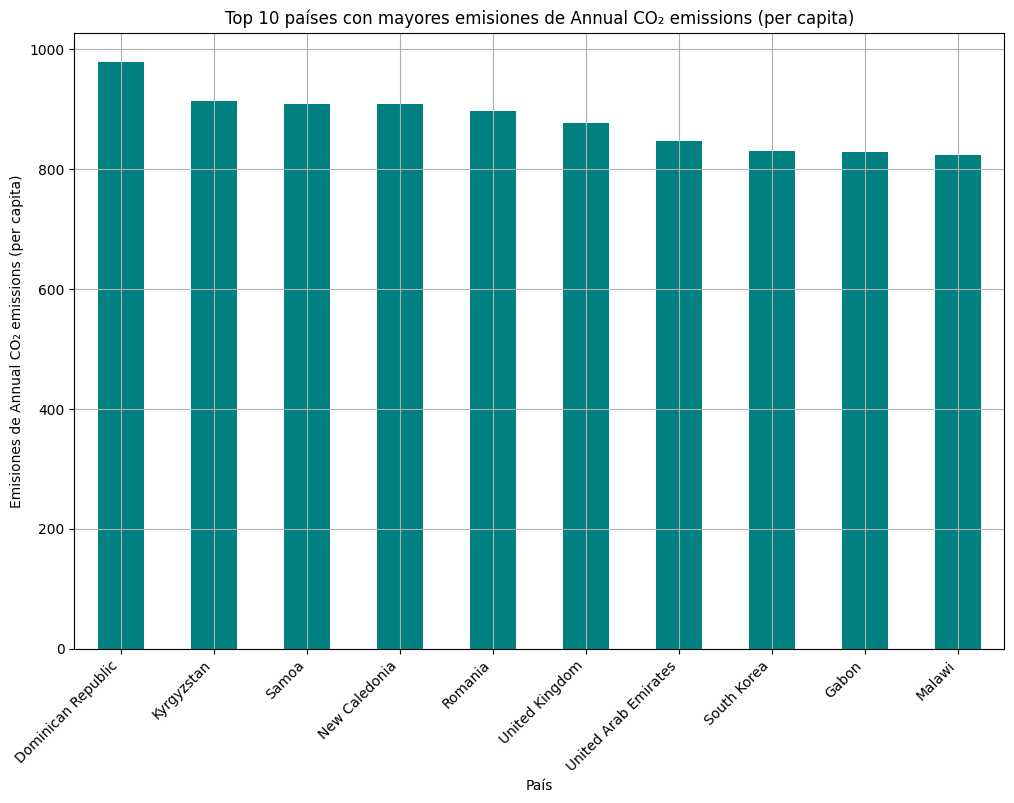

In [14]:
# 3.-Crea un gráfico de barras para mostrar las emisiones de CO2 per cápita de los 10 países con mayores emisiones.
# Agrupar los datos por país y calcular la media de las emisiones de CO2 per cápita
country_co2 = df.groupby('Entity')['Annual CO₂ emissions (per capita)'].mean()
# Obtener los 10 países con mayores emisiones
top_10_countries = country_co2.nlargest(10)
# Crear un gráfico de barras
plt.figure(figsize=(12, 8))
top_10_countries.plot(kind='bar', color='teal')
plt.title('Top 10 países con mayores emisiones de Annual CO₂ emissions (per capita)')
plt.xlabel('País')
plt.ylabel('Emisiones de Annual CO₂ emissions (per capita)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

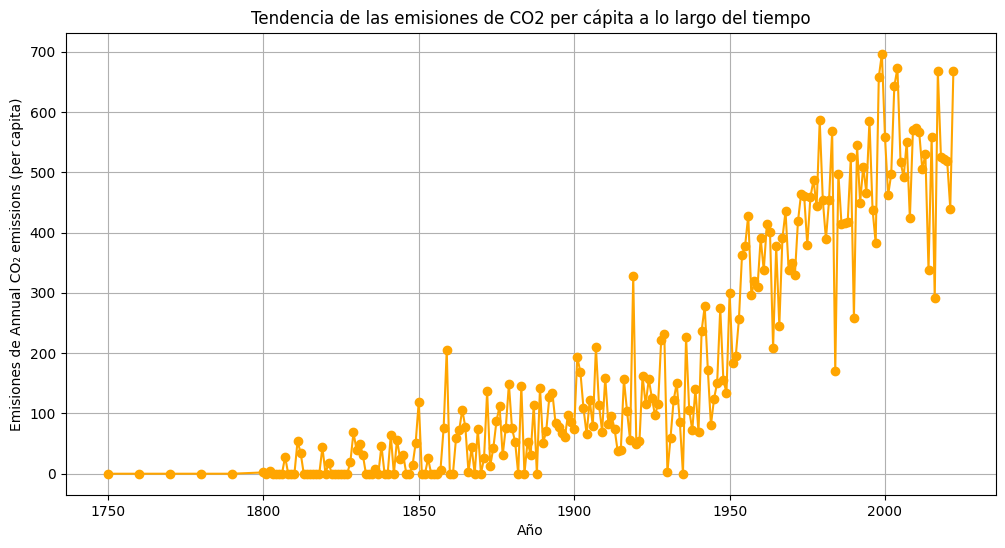

In [16]:
# 4.-Crea un gráfico de líneas que muestre la tendencia de las emisiones de CO2 per cápita a lo largo del tiempo (si los datos incluyen una dimensión temporal).
# La columna 'year' esté en formato de entero
df['Year'] = df['Year'].astype(int)
# Agrupar los datos por año y calcular la media de las emisiones de CO2 per cápita
yearly_co2 = df.groupby('Year')['Annual CO₂ emissions (per capita)'].mean()
# Crear un gráfico de líneas para mostrar la tendencia
plt.figure(figsize=(12, 6))
yearly_co2.plot(kind='line', color='orange', marker='o')
plt.title('Tendencia de las emisiones de CO2 per cápita a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Emisiones de Annual CO₂ emissions (per capita)')
plt.grid(True)
plt.show()

+ #1. Media, mediana y moda:
mean(), median() y mode() son funciones de pandas que calculan la media, mediana y moda, respectivamente.
La moda devuelve una serie, por lo que seleccionamos el primer valor con [0].

+ #2. Histograma:
El histograma es útil para visualizar la distribución de los datos. Usamos plt.hist() para crear el gráfico, con un número adecuado de "bins" para una representación detallada.

+ #3. Gráfico de barras:
Agrupamos los datos por país usando groupby(), luego calculamos la media de las emisiones de CO2 por país y seleccionamos los 10 países con mayores emisiones utilizando nlargest(10).
Se utiliza un gráfico de barras para mostrar los países y sus emisiones correspondientes.

+ #4. Gráfico de líneas:
Agrupamos los datos por año y calculamos la media de las emisiones de CO2 por año. Luego, usamos plt.plot() para crear un gráfico de líneas que muestra la tendencia a lo largo del tiempo.

## 5. Interpretación de Resultados

+ ¿Qué observaciones puedes hacer sobre los datos de emisiones de CO2 per cápita?

Una desigualdad global en las emisiones, los países con economías más desarrolladas (por ejemplo, Estados Unidos, Canadá, Australia) tienden a tener emisiones de CO2 per cápita mucho más altas que los países en desarrollo.
Si se comparan los datos a lo largo del tiempo, se puede observar que en muchos países las emisiones per cápita han aumentado a lo largo de las últimas décadas debido a la industrialización, el aumento del uso de vehículos privados, el crecimiento de la población y el aumento de la demanda de energía.
Tambien tienen un gran impacto en la politica y la transicion energetica, los países que han implementado políticas energéticas más estrictas, como el impulso hacia las energías renovables, la eficiencia energética y la adopción de vehículos eléctricos, pueden mostrar una desaceleración o reducción de sus emisiones per cápita.

### NOTA:
Las explicaciones de cada ejercico fueron sacadas de mi cuaderno y/o de internet

Miranda Alejandre Fabio Yurem 'Informatica 506'